In [1]:
from collections import defaultdict

def binary_file_to_integers(filename, chunk_size):
    """
    Read a binary file in chunks of bytes and convert each chunk to an integer.
    
    Args:
    - filename (str): Path to the binary file.
    - chunk_size (int): Number of bytes per chunk.
    
    Returns:
    - defaultdict: A dictionary with integers as keys and their occurrences as values.
    """
    int_counts = defaultdict(int)
    
    with open(filename, 'rb') as f:
        while True:
            chunk = f.read(chunk_size)
            if len(chunk) == 0:
                break
            
            # Convert bytes to integer
            chunk_int = int.from_bytes(chunk, byteorder='big')
            
            # Count occurrences
            int_counts[chunk_int] += 1
                
    return int_counts

filename = "data/states"
chunk_size = 32  # bytes of digest
result = binary_file_to_integers(filename, chunk_size)



In [2]:
# set of all occurences of digests, e.g. {1} means all digests occur once
set( a[1] for a in result.items())


{1}

In [3]:
import numpy as np

In [4]:
# read the data collected from experiments
# first line of 
import os

# one file represent one sender stats
dist_files = filter(lambda x: x[:4] == "dist" and len(x) > 4,
                    os.listdir("data/"))

dist_files = list(dist_files)
print(f"There are {len(dist_files)} senders")

# create a numpy vector
# get the number of receivers from the file 


# get the number of receivers and read the first file
with open("data/"+dist_files[0], "r") as f:
    # total number of digests send to each receiver by this sender
    line = f.readline()
    ndigests = list(map(int, list(line.split(","))[:-1]))
    nreceivers = len(ndigests)
    ndigests = np.array(ndigests)

    # total number of nmsgs sent to each receiver by this sender
    line = f.readline()
    nmsgs = list(map(int, list(line.split(","))[:-1]))
    nmsgs = np.array(nmsgs)
    
    # ndigests left in the buffer
    line = f.readline()
    nleft_buff = list(map(int, list(line.split(","))[:-1]))
    nleft_buff = np.array(nleft_buff)
    

There are 756 senders


In [5]:
for name in dist_files[1:]:
    # print(f"Treating {name}")
    #  aggregate data from senders into one array
    with open("data/"+name, "r") as f:
            line = f.readline()
            array = np.array(list(map(int, list(line.split(","))[:-1])))
            ndigests = ndigests + array
            
            line = f.readline()
            array = np.array(list(map(int, list(line.split(","))[:-1])))
            nmsgs = nmsgs + array

            line = f.readline()
            array = np.array(list(map(int, list(line.split(","))[:-1])))
            nleft_buff = nleft_buff + array
            

In [6]:
ndigests, 10**5*nmsgs + nleft_buff

(array([1704929852, 1704991150, 1704904807, 1704955877, 1704926549,
        1704901822, 1704909165, 1704846972, 1704887601, 1704907210,
        1704917831, 1704945229, 1704940144, 1704904696, 1704897173,
        1704915106, 1704902181, 1704917742, 1704995841, 1705020773,
        1704913123, 1704931458, 1705004582, 1704943762, 1704946443,
        1704929117, 1704942041, 1704984221, 1704935321, 1704917611,
        1704884699, 1704868764, 1704916646, 1704949241, 1704987044,
        1704896304, 1704901849, 1704958224, 1704918074, 1704990492]),
 array([1704929852, 1704991150, 1704904807, 1704955877, 1704926549,
        1704901822, 1704909165, 1704846972, 1704887601, 1704907210,
        1704917831, 1704945229, 1704940144, 1704904696, 1704897173,
        1704915106, 1704902181, 1704917742, 1704995841, 1705020773,
        1704913123, 1704931458, 1705004582, 1704943762, 1704946443,
        1704929117, 1704942041, 1704984221, 1704935321, 1704917611,
        1704884699, 1704868764, 1704916646, 17

<BarContainer object of 40 artists>

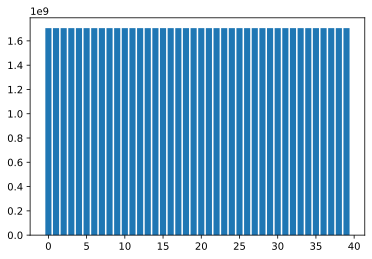

In [7]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline

# Set the figure size
#plt.rcParams["figure.figsize"] = [500, 500]
#plt.rcParams["figure.autolayout"] = True
x = list(range(nreceivers))
y = ndigests
plt.bar(x, y)

In [8]:
import pandas as pd
ndigests_pd = pd.Series(ndigests)

print(f"mean   = {ndigests_pd.mean()}")
print(f"median = {ndigests_pd.median()}")
print(f"std    = {ndigests_pd.std()}")

mean   = 1704930918.425
median = 1704922311.5
std    = 38260.06691650929


In [9]:
min(y)/max(y)

0.9998980651715497